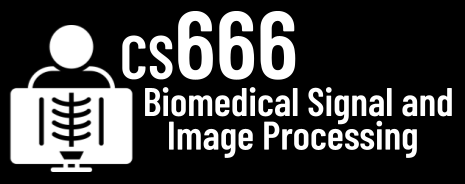

# Assignment 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [3]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 3.5 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [5]:
from biosppy import storage
from biosppy.signals import ecg

signal, metadata = storage.load_txt('ecg.txt')

In [6]:
no_of_datapoints=len(signal)
print(no_of_datapoints)
print(metadata)

15000
{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}


**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [7]:
SAMPLING_RATE = metadata['sampling_rate']
SECONDS = no_of_datapoints/SAMPLING_RATE

print("sampling rate:",SAMPLING_RATE)
print("Seconds:",SECONDS)

sampling rate: 1000.0
Seconds: 15.0


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

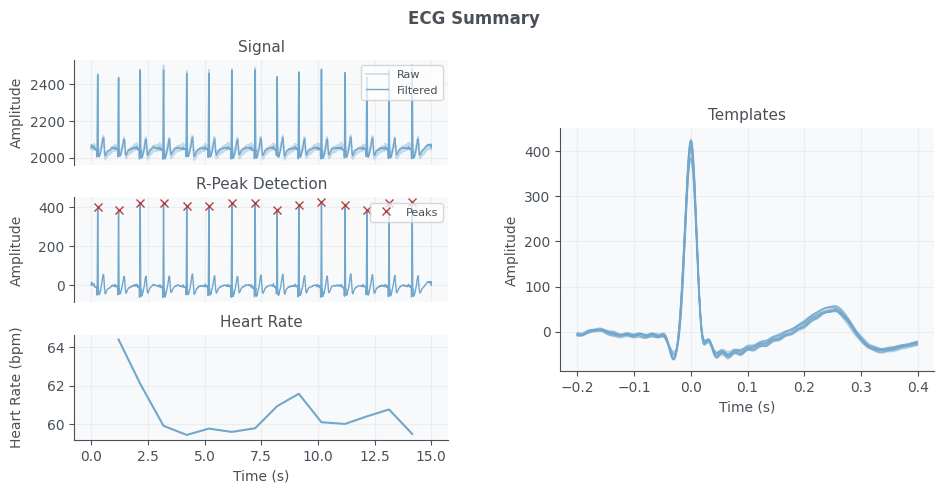

In [8]:
ecg_result=ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

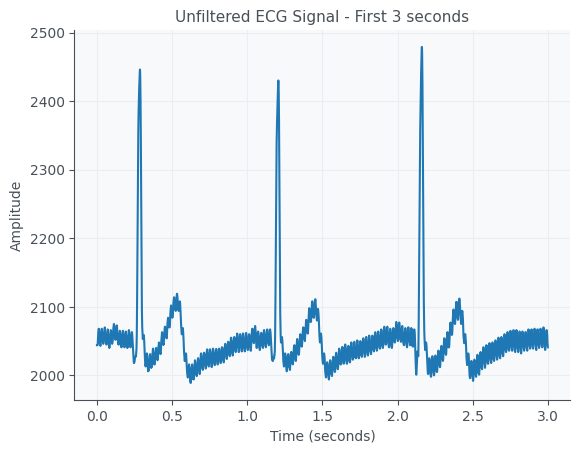

In [9]:
### TODO plot unfiltered signal
unfiltered_signal = signal
time_axis = [i / SAMPLING_RATE for i in range(len(unfiltered_signal))]

# Plot the first 3 seconds
plt.plot(time_axis[:int(3 * SAMPLING_RATE)], unfiltered_signal[:int(3 * SAMPLING_RATE)])
plt.title('Unfiltered ECG Signal - First 3 seconds')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

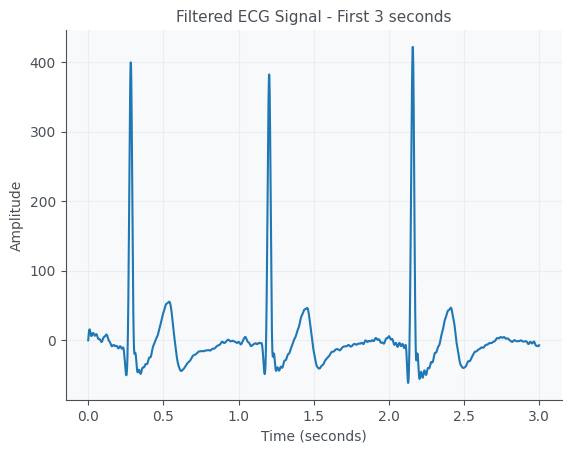

In [10]:
### TODO plot filtered signal
filtered_signal=ecg_result['filtered']
time_axis = [i / SAMPLING_RATE for i in range(len(filtered_signal))]

# Plot the first 3 seconds
plt.plot(time_axis[:int(3 * SAMPLING_RATE)], filtered_signal[:int(3 * SAMPLING_RATE)])
plt.title('Filtered ECG Signal - First 3 seconds')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

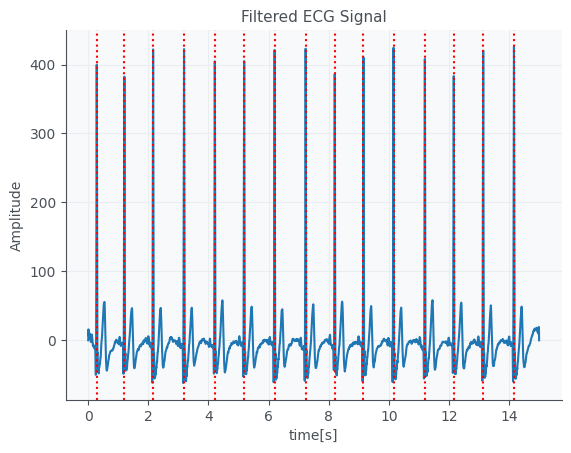

In [12]:
### TODO
rpeaks=ecg_result['rpeaks']

time_axis = [i / SAMPLING_RATE for i in range(len(filtered_signal))]

plt.plot(time_axis, filtered_signal)
for i in rpeaks:
   plt.axvline(x = i/SAMPLING_RATE, color = 'r', ls=':')
plt.title('Filtered ECG Signal')
plt.xlabel('time[s]')
plt.ylabel('Amplitude')
plt.show()



**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [13]:
!pip install neurokit2
import neurokit2 as nk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.3 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [14]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

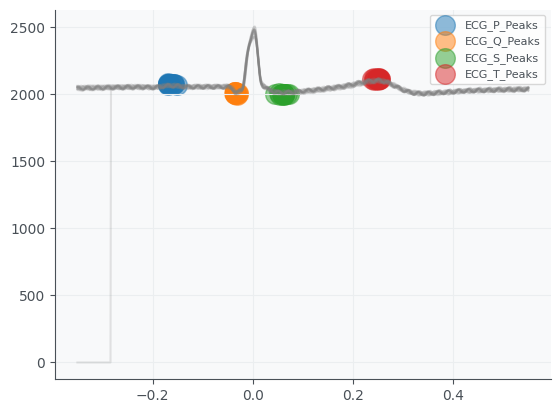

In [15]:
# TODO Does the detection work well?

# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak",show=True, show_type='peaks')



**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [16]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

In [17]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

!pip install sleepecg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.8 MB/s eta 0:00:00


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time (s)'>)

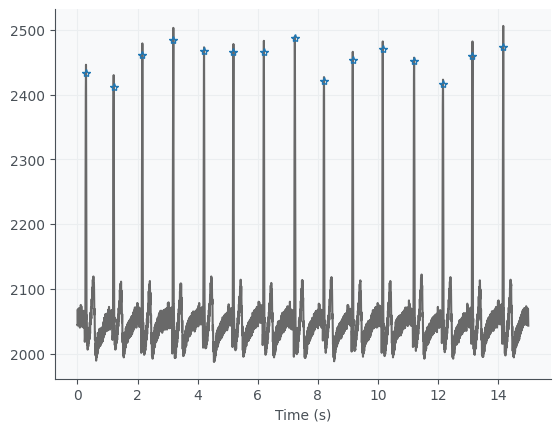

In [18]:
from sleepecg import detect_heartbeats, plot_ecg

beats = detect_heartbeats(signal, SAMPLING_RATE)

plot_ecg(signal, SAMPLING_RATE, beats=beats)




In [19]:
biosppy_rpeaks=rpeaks
sleepecg_rpeaks=beats

mse=np.mean((np.array(biosppy_rpeaks) - np.array(sleepecg_rpeaks))**2)
print(mse)

# mse indicates that they are giving different peaks

0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

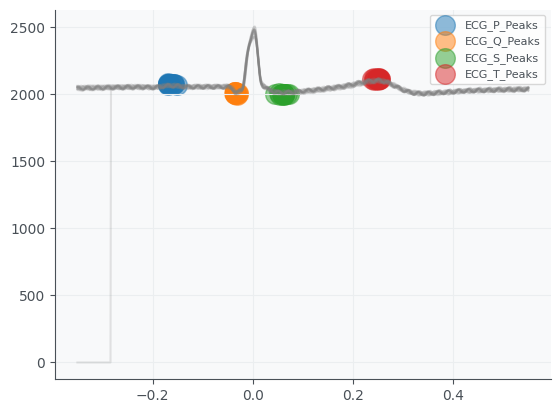

In [20]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
#before filtering
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak",show=True, show_type='peaks')

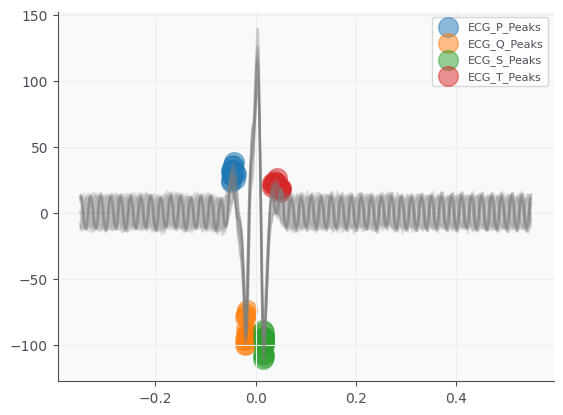

In [21]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

filtered=nk.signal_filter(signal, sampling_rate=1000, lowcut=20, highcut=200, method='butterworth', order=2, window_size='default', powerline=50, show=False)
#after filtering
_, waves_peak = nk.ecg_delineate(filtered, rpeaks, sampling_rate=SAMPLING_RATE, method="peak",show=True, show_type='peaks')

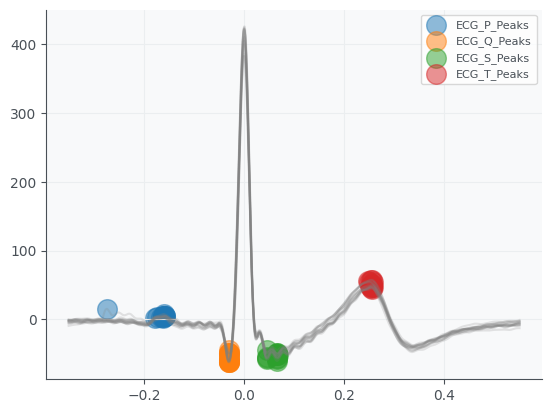

In [22]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(filtered_signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak",show=True, show_type='peaks')

In [23]:
# TODO Which one works the best?

# delineation on the filtered signal from BioSPPY

In [24]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#